## Import Libraries & Data

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

%matplotlib inline

In [546]:
dataset = pd.read_csv('data/2017-06-potong-3-new-freq.csv')
data = dataset.copy()

## Dealing with time

In [547]:
data['timestamp'] = pd.to_datetime(dataset['timestamp'])

def get_day_of_week(dt):
    return dt.weekday()
def get_hour(dt):
    return dt.hour

data['day_of_week'] = data['timestamp'].apply(get_day_of_week)
data['hour'] = data['timestamp'].apply(get_hour)


## Add location zone

In [548]:
data['location_zone'] = (data['linear_ref'] * 10000).apply(math.floor)
data[data['location_zone'] > 10000] = 10000

In [549]:
# # 3nd previous point
temp_data3 = data.copy()
temp_data3['last_point_time'] = temp_data3['timestamp'].shift(3)
temp_data3['second_from_last_point'] = (temp_data3['timestamp'] - temp_data3['timestamp'].shift(3)).dt.total_seconds()
temp_data3['distance_from_last_point'] = temp_data3['linear_ref'] - temp_data3['linear_ref'].shift(3)
temp_data3['last_point_location'] = temp_data3['linear_ref'].shift(3)
temp_data3['last_point_lat'] = temp_data3['lat'].shift(3)
temp_data3['last_point_lon'] = temp_data3['lon'].shift(3)

# # 2nd previous point
temp_data = data.copy()
temp_data['last_point_time'] = temp_data['timestamp'].shift(2)
temp_data['second_from_last_point'] = (temp_data['timestamp'] - temp_data['timestamp'].shift(2)).dt.total_seconds()
temp_data['distance_from_last_point'] = temp_data['linear_ref'] - temp_data['linear_ref'].shift(2)
temp_data['last_point_location'] = temp_data['linear_ref'].shift(2)
temp_data['last_point_lat'] = temp_data['lat'].shift(2)
temp_data['last_point_lon'] = temp_data['lon'].shift(2)


# # Last point
data['last_point_time'] = data['timestamp'].shift()
data['second_from_last_point'] = (data['timestamp'] - data['timestamp'].shift()).dt.total_seconds()
data['distance_from_last_point'] = data['linear_ref'] - data['linear_ref'].shift()
data['last_point_location'] = data['linear_ref'].shift()
data['last_point_lat'] = data['lat'].shift()
data['last_point_lon'] = data['lon'].shift()

/home/aiy/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/aiy/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


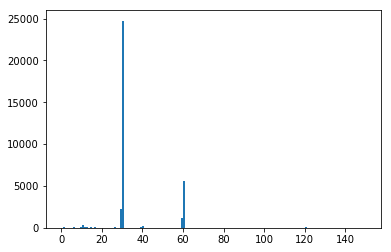

In [550]:
plt.hist(data['second_from_last_point'], bins=150, range=(0,150))
plt.show()

In [551]:
data

,vid,timestamp,trip_id,linear_ref,speed,direction,lat,lon,route_length_in_meter,distance_from_route_in_meter,day_of_week,hour,location_zone,last_point_time,second_from_last_point,distance_from_last_point,last_point_location,last_point_lat,last_point_lon
0,117620103021,2017-05-01 05:57:55,1,0.980654,16,in,7.865700,98.394317,15561,3.604501,0,5,9806,NaT,NaN,NaN,NaN,NaN,NaN
1,117620103021,2017-05-01 05:58:55,1,0.949510,39,in,7.868683,98.391683,15561,7.925984,0,5,9495,2017-05-01 05:57:55,60.0,-0.031144,0.980654,7.865700,98.394317
2,117620103021,2017-05-01 05:59:55,1,0.921781,32,in,7.872167,98.390017,15561,4.649478,0,5,9217,2017-05-01 05:58:55,60.0,-0.027729,0.949510,7.868683,98.391683
3,117620103021,2017-05-01 06:00:55,1,0.875107,41,in,7.876950,98.387550,15561,9.839113,0,6,8751,2017-05-01 05:59:55,60.0,-0.046674,0.921781,7.872167,98.390017
4,117620103021,2017-05-01 06:01:54,1,0.829956,36,in,7.879517,98.382350,15561,15.625715,0,6,8299,2017-05-01 06:00:55,59.0,-0.045151,0.875107,7.876950,98.387550
5,117620103021,2017-05-01 06:02:54,1,0.792755,44,in,7.880383,98.377317,15561,8.427758,0,6,7927,2017-05-01 06:01:54,60.0,-0.037201,0.829956,7.879517,98.382350
6,117620103021,2017-05-01 06:03:54,2,0.250973,43,out,7.880833,98.370483,15832,3.221549,0,6,2509,2017-05-01 06:02:54,60.0,-0.541782,0.792755,7.880383,98.377317
7,117620103021,2017-05-01 06:04:54,2,0.299762,24,out,7.881567,98.363933,15832,0.456722,0,6,2997,2017-05-01 06:03:54,60.0,0.048790,0.250973,7.880833,98.370483
8,117620103021,2017-05-01 06:05:54,2,0.344204,40,out,7.887317,98.366500,15832,7.524923,0,6,3442,2017-05-01 06:04:54,60.0,0.044442,0.299762,7.881567,98.363933
9,117620103021,2017-05-01 06:06:54,2,0.381966,0,out,7.888350,98.370383,15832,0.954903,0,6,3819,2017-05-01 06:05:54,60.0,0.037762,0.344204,7.887317,98.366500


## append all the data

In [552]:
data = pd.concat([data, temp_data, temp_data3])

In [553]:

# # linear ref delta
#data['delta_linear_ref'] = data['linear_ref'] - data[']

# # Remove Missing data and Outlier
data.dropna(inplace=True)
data = data.drop(data[data['distance_from_last_point'] <= 0].index)
data = data.drop(data[data['distance_from_last_point'] > 0.2].index)
data = data.drop(data[data['second_from_last_point'] > 1000].index)

# # Filter relavant data and divide into in and out trip
data = data[['linear_ref', 'direction', 'day_of_week', 'hour', 'speed',
             'location_zone', 'second_from_last_point',  'last_point_location']]
#data = data[['lat', 'lon', 'direction', 'day_of_week', 'hour', 'speed',
#             'second_from_last_point',  'last_point_lat', 'last_point_lon']]

#data = data[['distance_from_last_point', 'direction', 'day_of_week', 'hour', 'speed',
#             'second_from_last_point', 'last_point_location']]

# # Machine Learning - Train data
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


In [554]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder_direction = LabelEncoder()
X[:, 0] = labelencoder_direction.fit_transform(X[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor()
# regressor.fit(X_train, y_train)

from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)

#from sklearn.linear_model import MultiTaskElasticNet
#regressor = MultiTaskElasticNet()
#regressor.fit(X_train, y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [555]:

y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)


In [556]:
score

0.99999998665449741

In [557]:
data

,linear_ref,direction,day_of_week,hour,speed,location_zone,second_from_last_point,last_point_location
9,0.381966,out,0,6,0,3819,60.0,0.344204
10,0.389191,out,0,6,38,3891,59.0,0.381966
11,0.434615,out,0,6,45,4346,60.0,0.389191
12,0.462533,out,0,6,29,4625,60.0,0.434615
13,0.489000,out,0,6,37,4889,60.0,0.462533
14,0.519698,out,0,6,42,5196,60.0,0.489000
15,0.535329,out,0,6,0,5353,60.0,0.519698
16,0.562077,out,0,6,33,5620,59.0,0.535329
17,0.600321,out,0,6,39,6003,60.0,0.562077
18,0.638172,out,0,6,30,6381,60.0,0.600321


In [558]:
# X[0,:]

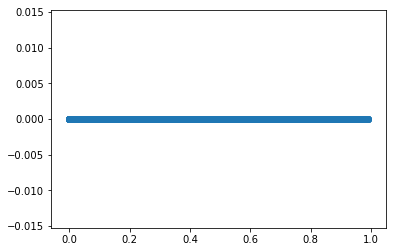

In [559]:
y_diff = y_pred - y_test

plt.scatter(X_test[:,-1], y_diff)
plt.show()

In [560]:
X_test_65 = X_test[X_test[:, -2] < 65]
y_diff_65 = y_diff[X_test[:, -2] < 65]

In [561]:
print(y_diff_65.mean()*15561)
print(y_diff_65.std()*15561)

-0.00246472660031
0.450514080343


In [562]:
y_diff_more_65 = y_diff[X_test[:, -2] >= 65]
print(y_diff_more_65.mean()*15561)
print(y_diff_more_65.std()*15561)

0.00141266581363
0.455134751554


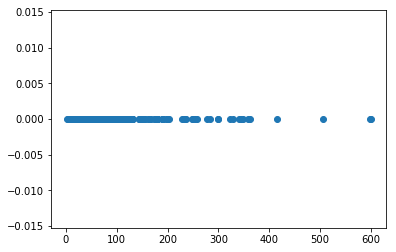

In [563]:
plt.scatter(X_test[:,-2], y_diff)
plt.show()

In [564]:
len(X_test[X_test[:, 6] == 0])

3897

In [565]:
X_test_in = X_test[X_test[:, 6] == 0]
y_test_in = y_test[X_test[:, 6] == 0]
X_test_out = X_test[X_test[:, 6] == 1]
y_test_out = y_test[X_test[:, 6] == 1]
y_diff_in = y_diff[X_test[:, 6] == 0]
y_diff_out = y_diff[X_test[:, 6] == 1]

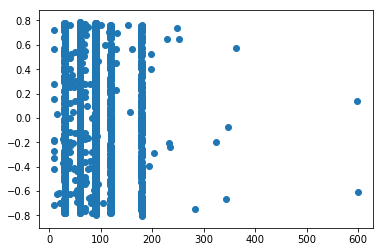

In [566]:
plt.scatter(X_test_in[:,-2], y_diff_in*15561)
plt.show()

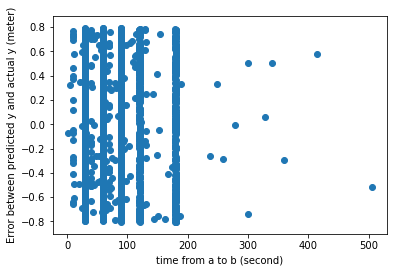

In [567]:
plt.scatter(X_test_out[:,-2], y_diff_out*15832)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')

plt.show()


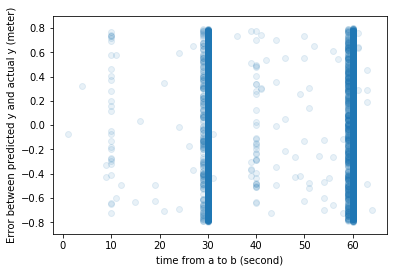

In [568]:
plt.scatter(X_test_65[:,-2], y_diff_65*15832, alpha=0.1)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')

plt.show()

In [569]:
y_diff[(X_test[:, -2] <11) & (X_test[:, -2] > 9)] * 15832

array([-0.19561958,  0.74709611,  0.73710483,  0.72189989, -0.72715749,
       -0.29385939, -0.64167802,  0.69365335, -0.07261235,  0.15738867,
        0.20236997, -0.18206909,  0.73088967,  0.11926682, -0.27155989,
       -0.12899974, -0.27663914,  0.40124412, -0.65216223, -0.04459844,
        0.28350076,  0.36923367,  0.46291771, -0.41074509,  0.76509175,
        0.57458218, -0.31830337])

In [570]:
data[(data.iloc[:, -2] <31) & (data.iloc[:, -2] > 29)]

,linear_ref,direction,day_of_week,hour,speed,location_zone,second_from_last_point,last_point_location
7025,0.053031,out,5,16,51,530,30.0,0.028470
7026,0.072352,out,5,16,40,723,30.0,0.053031
7027,0.084484,out,5,16,40,844,30.0,0.072352
7030,0.169313,out,5,16,17,1693,30.0,0.164263
7031,0.170818,out,5,16,0,1708,30.0,0.169313
7038,0.209544,out,5,16,50,2095,30.0,0.184726
7039,0.231122,out,5,16,32,2311,30.0,0.209544
7040,0.250101,out,5,16,43,2501,30.0,0.231122
7041,0.268852,out,5,16,23,2688,30.0,0.250101
7042,0.280306,out,5,16,20,2803,30.0,0.268852


In [571]:
dataset.iloc[7000:7050, :]

,vid,timestamp,trip_id,linear_ref,speed,direction,lat,lon,route_length_in_meter,distance_from_route_in_meter
7000,117620103021,2017-05-13T22:29:11+07:00,249,0.496239,0,in,7.888400,98.382917,15561,6.791675
7001,117620103021,2017-05-13T22:30:11+07:00,249,0.504739,27,in,7.887800,98.382217,15561,5.932532
7002,117620103021,2017-05-13T22:31:11+07:00,249,0.523435,11,in,7.885200,98.382383,15561,2.165877
7003,117620103021,2017-05-13T22:32:11+07:00,249,0.533379,16,in,7.883750,98.382483,15561,8.849892
7004,117620103021,2017-05-13T22:33:11+07:00,249,0.548493,0,in,7.884200,98.380450,15561,3.010744
7005,117620103021,2017-05-13T22:34:10+07:00,249,0.574011,30,in,7.885567,98.377200,15561,6.555946
7006,117620103021,2017-05-13T22:35:10+07:00,249,0.596954,0,in,7.886717,98.374217,15561,4.382451
7007,117620103021,2017-05-13T22:36:10+07:00,249,0.599420,26,in,7.886850,98.373900,15561,3.044553
7008,117620103021,2017-05-13T22:37:10+07:00,249,0.644601,45,in,7.887383,98.367950,15561,5.063229
7009,117620103021,2017-05-13T22:38:10+07:00,249,0.675658,7,in,7.884450,98.365233,15561,1.729815


(array([  2.10000000e+01,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   9.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.50000000e+01,   3.30000000e+02,
          1.70000000e+01,   0.00000000e+00,   4.00000000e+00,
          2.00000000e+01,   2.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   2.10000000e+01,   7.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   9.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   1.68000000e+03,
          1.91240000e+04,   0.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   8.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   2.00000000e+01,   1.44000000e+02,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   9.61000000e+02,
        

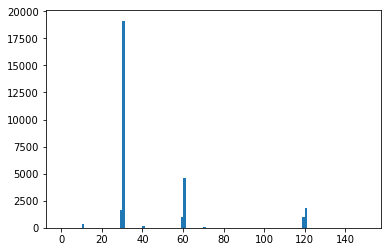

In [572]:
plt.hist(data.iloc[0:30000,-2], bins=120, range=(0,150))

In [573]:
data

,linear_ref,direction,day_of_week,hour,speed,location_zone,second_from_last_point,last_point_location
9,0.381966,out,0,6,0,3819,60.0,0.344204
10,0.389191,out,0,6,38,3891,59.0,0.381966
11,0.434615,out,0,6,45,4346,60.0,0.389191
12,0.462533,out,0,6,29,4625,60.0,0.434615
13,0.489000,out,0,6,37,4889,60.0,0.462533
14,0.519698,out,0,6,42,5196,60.0,0.489000
15,0.535329,out,0,6,0,5353,60.0,0.519698
16,0.562077,out,0,6,33,5620,59.0,0.535329
17,0.600321,out,0,6,39,6003,60.0,0.562077
18,0.638172,out,0,6,30,6381,60.0,0.600321


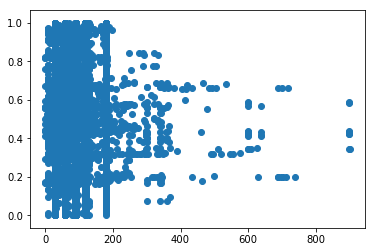

In [574]:
plt.scatter(X[:, -2], y)

In [575]:
X[:,-2]

array([ 60.,  59.,  60., ...,  89.,  90.,  90.])

## Lag time = 10

In [576]:
y_diff_10 = y_diff[(X_test[:, -2] >= 9) & (X_test[:, -2] <= 11)]
X_test_10 = X_test[(X_test[:, -2] >= 9) & (X_test[:, -2] <= 11)]

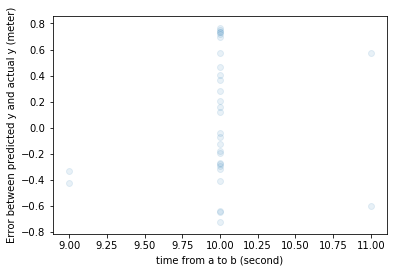

In [577]:
plt.scatter(X_test_10[:,-2], y_diff_10*15832, alpha=0.1)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')

plt.show()

In [578]:
print("Mean (at lag_time = 10s) : " + str(y_diff_10.mean()*15696) + " meters")
print("SD (at lag_time = 10s) : " + str(y_diff_10.std()*15696) + " meters")

Mean (at lag_time = 10s) : 0.0628724282925 meters
SD (at lag_time = 10s) : 0.472999677851 meters


## Lag time = 30

In [579]:
y_diff_30 = y_diff[(X_test[:, -2] >= 29) & (X_test[:, -2] <= 31)]
X_test_30 = X_test[(X_test[:, -2] >= 29) & (X_test[:, -2] <= 31)]

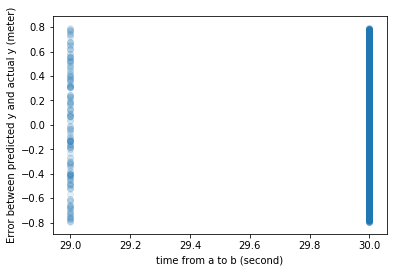

In [580]:
plt.scatter(X_test_30[:,-2], y_diff_30*15832, alpha=0.1)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')

plt.show()

In [581]:
print("Mean (at lag_time = 29s/30s) : " + str(y_diff_30.mean()*15696) + " meters")
print("SD (at lag_time = 29s/30s) : " + str(y_diff_30.std()*15696) + " meters")

Mean (at lag_time = 29s/30s) : -0.00135580259438 meters
SD (at lag_time = 29s/30s) : 0.455925511547 meters


## Lag time = 60

In [582]:
y_diff_60 = y_diff[(X_test[:, -2] >= 59) & (X_test[:, -2] <= 61)]
X_test_60 = X_test[(X_test[:, -2] >= 59) & (X_test[:, -2] <= 61)]

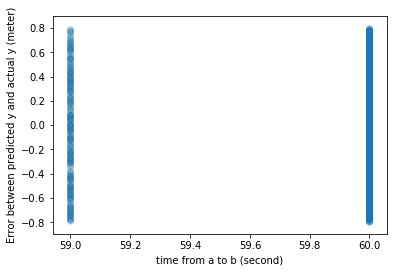

In [583]:
plt.scatter(X_test_60[:,-2], y_diff_60*15832, alpha=0.1)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')

plt.show()

In [584]:
print("Mean (at lag_time = 59s/60s) : " + str(y_diff_60.mean()*15696) + " meters")
print("SD (at lag_time = 59s/60s) : " + str(y_diff_60.std()*15696) + " meters")

Mean (at lag_time = 59s/60s) : -0.00262415690343 meters
SD (at lag_time = 59s/60s) : 0.452824965368 meters


(array([  80.,  100.,   90.,   73.,   88.,   88.,   95.,   94.,   83.,
         100.,   74.,   84.,   79.,   96.,  110.,   86.,   87.,  102.,
          81.,   86.,   85.,   86.,   87.,   98.,   80.,   81.,   88.,
         101.,   84.,   70.]),
 array([ -5.04890943e-05,  -4.71188324e-05,  -4.37485706e-05,
         -4.03783087e-05,  -3.70080469e-05,  -3.36377850e-05,
         -3.02675232e-05,  -2.68972614e-05,  -2.35269995e-05,
         -2.01567377e-05,  -1.67864758e-05,  -1.34162140e-05,
         -1.00459521e-05,  -6.67569026e-06,  -3.30542841e-06,
          6.48334339e-08,   3.43509528e-06,   6.80535713e-06,
          1.01756190e-05,   1.35458808e-05,   1.69161427e-05,
          2.02864045e-05,   2.36566664e-05,   2.70269282e-05,
          3.03971901e-05,   3.37674519e-05,   3.71377138e-05,
          4.05079756e-05,   4.38782375e-05,   4.72484993e-05,
          5.06187612e-05]),
 <a list of 30 Patch objects>)

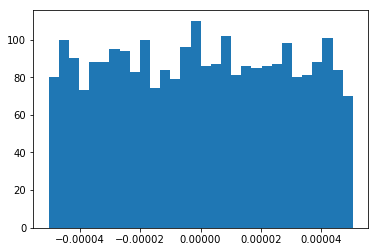

In [585]:
plt.hist(y_diff_60, bins= 30)

## Lag time = 120

In [586]:
y_diff_120 = y_diff[(X_test[:, -2] >= 119) & (X_test[:, -2] <= 121)]
X_test_120 = X_test[(X_test[:, -2] >= 119) & (X_test[:, -2] <= 121)]

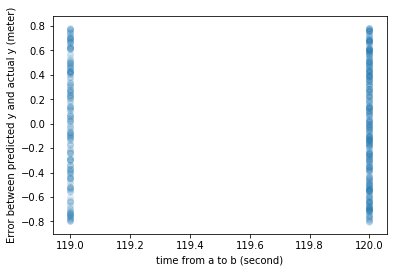

In [587]:
plt.scatter(X_test_120[:,-2], y_diff_120*15832, alpha=0.1)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')

plt.show()

In [588]:
print("Mean (at lag_time = 119s/120s) : " + str(y_diff_120.mean()*15696) + " meters")
print("SD (at lag_time = 119s/120s) : " + str(y_diff_120.std()*15696) + " meters")

Mean (at lag_time = 119s/120s) : 0.0111955794877 meters
SD (at lag_time = 119s/120s) : 0.46638909646 meters


In [589]:
data.shape

(81207, 8)